In [1]:
!pip install -U scikit-learn
!pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 2.9 MB/s 


In [227]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as cs
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler ,StandardScaler

In [264]:
df=pd.read_csv('/content/spaceship-Titanic.csv')

In [265]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [267]:
df.isnull().mean() *100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [268]:
df=df.drop(df[df['Name'].isnull()].index)
df=df.drop(df[df['HomePlanet'].isnull()].index)
df=df.drop(df[df['Destination'].isnull()].index)

In [269]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [270]:
df['HomePlanet'].mode()

0    Earth
dtype: object

In [271]:
df['HomePlanet'].describe()

count      8125
unique        3
top       Earth
freq       4399
Name: HomePlanet, dtype: object

In [272]:
# df['HomePlanet'].fillna(df['HomePlanet'].mode()[0],inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


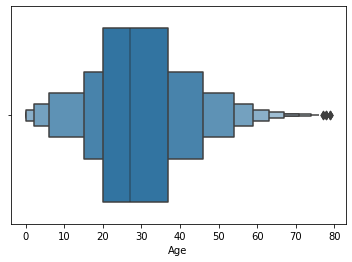

In [273]:
sns.boxenplot(df['Age'])

In [274]:
df['Age'].describe()

count    8125.000000
mean       28.819588
std        14.346001
min         0.000000
25%        20.000000
50%        27.000000
75%        37.000000
max        79.000000
Name: Age, dtype: float64

In [275]:
max= df['Age'].quantile(.95)
max

55.0

In [276]:
min=df['Age'].quantile(.12)
min

14.0

In [277]:
new_df=df[(df['Age']<max)&(df['Age']>min)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


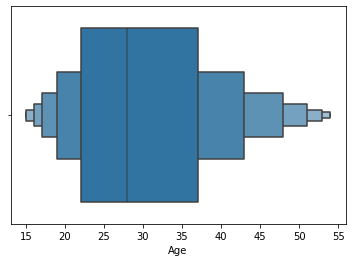

In [278]:
sns.boxenplot(new_df['Age'])

In [279]:
scal=MinMaxScaler()
df['Age']=scal.fit_transform(df['Age'].to_numpy().reshape(-1,1))

In [280]:
df['Age'].describe()

count    8125.000000
mean        0.364805
std         0.181595
min         0.000000
25%         0.253165
50%         0.341772
75%         0.468354
max         1.000000
Name: Age, dtype: float64

In [281]:
df['HomePlanet'].unique()
mapping={
    'Europa':0,
    'Earth':1,
    'Mars':2
}
df['HomePlanet']=df['HomePlanet'].map(mapping)

In [282]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,0,False,B/0/P,TRAPPIST-1e,0.493671,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,1,False,F/0/S,TRAPPIST-1e,0.303797,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,0,False,A/0/S,TRAPPIST-1e,0.734177,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,0,False,A/0/S,TRAPPIST-1e,0.417722,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,1,False,F/1/S,TRAPPIST-1e,0.202532,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [283]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,0,False,B/0/P,TRAPPIST-1e,0.493671,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,1,False,F/0/S,TRAPPIST-1e,0.303797,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,0,False,A/0/S,TRAPPIST-1e,0.734177,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,0,False,A/0/S,TRAPPIST-1e,0.417722,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,1,False,F/1/S,TRAPPIST-1e,0.202532,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [284]:
df['Destination'].describe()

count            8125
unique              3
top       TRAPPIST-1e
freq             5635
Name: Destination, dtype: object

In [285]:
df['Destination'].unique()
mapping2={
    'TRAPPIST-1e':0,
    'PSO J318.5-22':1,
    '55 Cancri e':2
}
df['Destination']=df['Destination'].map(mapping2)
df=df.drop(columns='Cabin')
df=df.drop(columns='Name')
df=df.drop(columns='PassengerId')
df=df.drop(columns='CryoSleep')

In [286]:
df.head()

,HomePlanet,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,0,0.493671,False,0.0,0.0,0.0,0.0,0.0,False
1,1,0,0.303797,False,109.0,9.0,25.0,549.0,44.0,True
2,0,0,0.734177,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0,0,0.417722,False,0.0,1283.0,371.0,3329.0,193.0,False
4,1,0,0.202532,False,303.0,70.0,151.0,565.0,2.0,True


In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8125 entries, 0 to 8692
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8125 non-null   int64  
 1   Destination   8125 non-null   int64  
 2   Age           8125 non-null   float64
 3   VIP           7929 non-null   object 
 4   RoomService   7954 non-null   float64
 5   FoodCourt     7955 non-null   float64
 6   ShoppingMall  7931 non-null   float64
 7   Spa           7954 non-null   float64
 8   VRDeck        7944 non-null   float64
 9   Transported   8125 non-null   bool   
dtypes: bool(1), float64(6), int64(2), object(1)
memory usage: 642.7+ KB


In [288]:
df.fillna(df.mean(),inplace=True)

In [313]:
y=df['HomePlanet']
x=df
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)
print(x_test.shape)

(2438, 10)


In [310]:
model=LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)

score=accuracy_score(pred,y_test)

print(score)

0.5422477440525021


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
